# Exercise 4: Similarity Measures

We can extract information from a variety of texts, calculate their TF-IDF scores, and do some basic visualizations of the data. But often what we care about in text analysis is *how texts are related to one another*. So how do you get from information about a text to information about a text's relation to a corpus?

There are a few classic measures of similarity that will show how close or distant a particular data sample is from another. What we've built up so far is a long *vector* of data. Those vectors can be imagines as points in Cartesian space, but points with many more dimensions than we can graph. However, using relatively basic linear algebra, we can imagine where those points sit in relation to the others.

We need to add a new Python library to our repertoire: one that was probably already added as a dependency earlier on: scipy. **scipy** will give us the information we need to calculate distances.

In [35]:
# For getting our text:
import csv, glob
from lxml import etree

# For data processing and analysis:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist, squareform #pdist and squareform are the two new functions we'll need

# For visualization:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
# Now let's quickly prep our data

filenames = glob.glob('data/tfidf_texts/*')

all_texts_as_strings = {}
for filename in filenames:
    textname = filename.split('/')[-1].split('.')[0]
    print(textname)
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter="\t")
        punct = list(".,!?():;")
        reg_tokens = [row[3].lower() for row in reader if row[3] not in punct]
        reg_string = ' '.join(reg_tokens)
        all_texts_as_strings[textname] = reg_string
        

am_ep
fowre_hymnes
axiochus
complaints
prothalamion


In [12]:
# And let's do the same for the books of FQ and add them to our dictionary

with open('data/fq_ma.xml', 'r') as xmlfile: # Open the file
    fq_text = xmlfile.read() # Read the file as plaintext
    fq_xml = etree.fromstring(fq_text) # Convert plaintext to an etree object
    
all_books = fq_xml.findall('.//{*}div[@type="book"]')

# Here's something new:
# We can use a special counting function called enumerate to keep track of numbers as we loop
for i,book in enumerate(all_books):
    # Now let's construct a book name based on the number we're on
    bookname = "FQ{}".format(i+1) # This needs to be plus one because counting begins at 0
    book_regs = [word.get('reg').lower() for word in book.findall('.//{*}w')]
    book_regs_as_string = " ".join(book_regs)
    all_texts_as_strings[bookname] = book_regs_as_string
    
    
# Now are dictionary exists with all the texts we want:
print(list(all_texts_as_strings.keys()))

['am_ep', 'fowre_hymnes', 'axiochus', 'complaints', 'prothalamion', 'FQ1', 'FQ2', 'FQ3', 'FQ4', 'FQ5', 'FQ6']


In [16]:
# Now let's run TF-IDF and put our information into a DataFrame

vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)

transformed_documents = vectorizer.fit_transform(list(all_texts_as_strings.values()))

transformed_documents_all = transformed_documents.toarray()

all_words = vectorizer.get_feature_names()

df = pd.DataFrame(transformed_documents_all, columns=all_words, index=list(all_texts_as_strings.keys()))

# Previously we transposed at this point to make things easier to read
# Now that we're doing math, we DON'T want to mess with the normal structure

df

,10,11,12,13,14,15,1590,1591,1592,1596,...,ywist,zeal,zealous,zephirus,zephyrus,zeuxis,ziffius,zins,ʋer,ιο
am_ep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fowre_hymnes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.386294,0.000000,7.158883,...,0.000000,2.810930,1.538997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
axiochus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.791759,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.791759,0.000000
complaints,7.158883,8.375278,8.375278,5.583519,5.583519,5.583519,2.791759,7.158883,0.000000,0.000000,...,2.791759,2.810930,1.538997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
prothalamion,2.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.386294,...,0.000000,0.000000,0.000000,0.000000,2.386294,0.000000,0.000000,0.000000,0.000000,0.000000
FQ1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.621860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.791759
FQ2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.538997,2.791759,2.386294,0.000000,2.791759,2.791759,0.000000,0.000000
FQ3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.216395,3.077993,0.000000,0.000000,2.791759,0.000000,0.000000,0.000000,0.000000
FQ4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.216395,1.538997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FQ5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.432791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### We've prepped our data, and finally arrived at the new material

We would like to know, based on the *looong* vector of features for each texts, how similar those texts are to one another.

We can accomplish this by calculating the **Euclidean Distance** between each text and putting that into a new dataframe.

In [23]:
distances = pd.DataFrame(squareform(pdist(df)), columns=list(all_texts_as_strings.keys()), index=list(all_texts_as_strings.keys()))
distances

,am_ep,fowre_hymnes,axiochus,complaints,prothalamion,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6
am_ep,0.000000,292.066874,300.329362,397.683754,279.652699,427.655777,540.789371,499.048764,475.474544,552.976107,555.302660
fowre_hymnes,292.066874,0.000000,168.976882,306.912278,129.507159,349.046483,480.020433,431.565508,404.505360,493.763228,495.058988
axiochus,300.329362,168.976882,0.000000,322.342356,139.962259,360.061891,488.058293,442.609265,412.742628,499.917073,502.802701
complaints,397.683754,306.912278,322.342356,0.000000,309.354543,410.711890,519.507215,477.805086,463.826433,543.191256,547.303223
prothalamion,279.652699,129.507159,139.962259,309.354543,0.000000,346.093864,478.386720,431.127813,400.391507,490.214119,492.285045
FQ1,427.655777,349.046483,360.061891,410.711890,346.093864,0.000000,421.985152,370.055841,378.274274,441.889655,457.965919
FQ2,540.789371,480.020433,488.058293,519.507215,478.386720,421.985152,0.000000,401.953545,439.054962,464.369785,487.348738
FQ3,499.048764,431.565508,442.609265,477.805086,431.127813,370.055841,401.953545,0.000000,329.963156,401.360259,426.289624
FQ4,475.474544,404.505360,412.742628,463.826433,400.391507,378.274274,439.054962,329.963156,0.000000,405.754806,439.762167
FQ5,552.976107,493.763228,499.917073,543.191256,490.214119,441.889655,464.369785,401.360259,405.754806,0.000000,458.105231


In that single line of code we really nested a few things.

First we calculated Euclidean distance on our dataframe using pdist:

`pdist(df)`

That gives us the distances in a condensed form. We need them in a *squareform* to put them back into a dataframe:

`squareform(pdist(df))`

Finally that new data goes into a completely new dataframe, with the text names as both columns and indices.

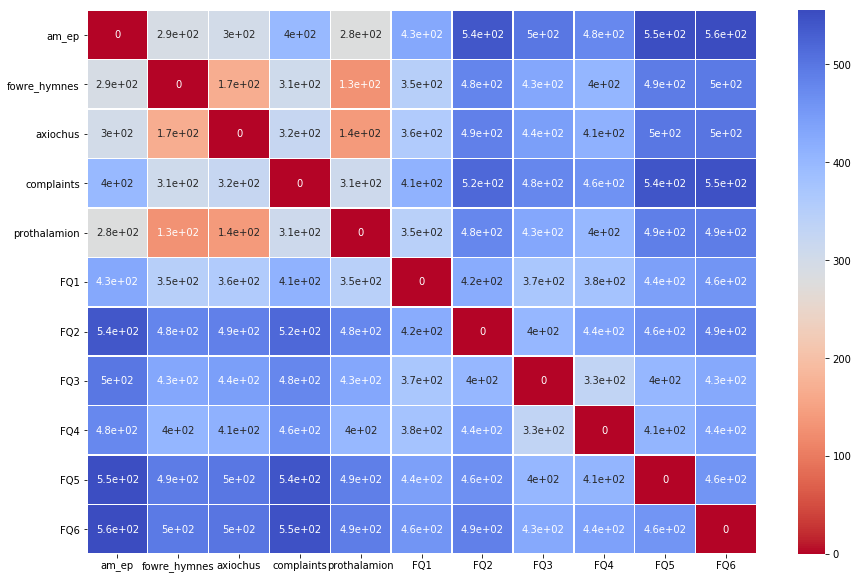

In [33]:
# Now that we have our distances, we can construct a sensible heatmap
# However, let's reverse the colormap so that the *lowest* numbers,
# i.e. the texts that are closest to each other,
# show up in red.

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(distances,annot=True,cmap='coolwarm_r',linewidths=.5)

# But wait!

### Could it really be true that the Books of the Faerie Queene, parts of that *same text*, aren't all that similar to one another?

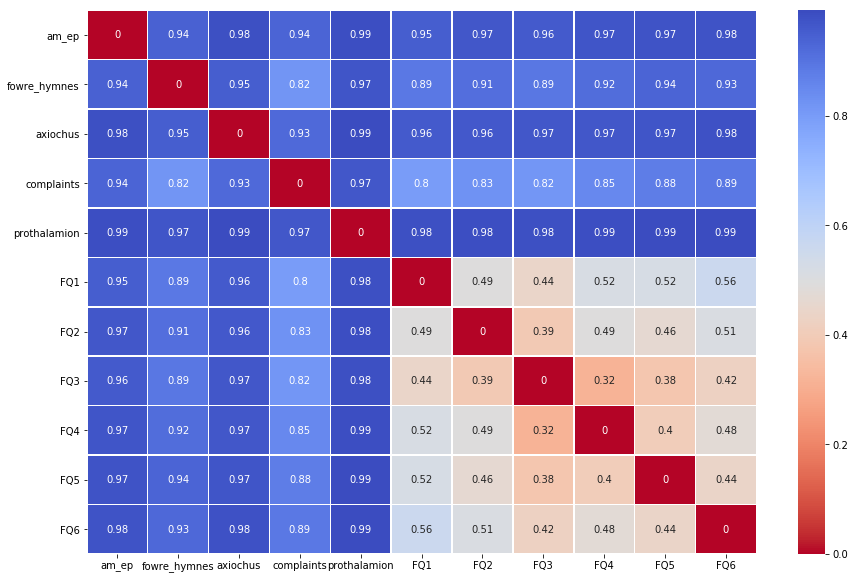

In [34]:
# The pdist function lets us do lots of different similarity measures
# For example, let's try cosine similarity instead of euclidean distance

cosine_distances = pd.DataFrame(squareform(pdist(df, metric="cosine")), columns=list(all_texts_as_strings.keys()), index=list(all_texts_as_strings.keys()))

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cosine_distances,annot=True,cmap='coolwarm_r',linewidths=.5)

## We got very different results from these two measures!

## Why?